In [1]:
%config IPCompleter.greedy=True
from IPython.display import IFrame
from MyLearner import MyLearner
# from MyLearner_test import MyLearner
from MyScorer import MyScorer
from MyPlotter import MyPlotter
import pandas as pd
import numpy as np
import string
import itertools
# from sympy.combinatorics.graycode import GrayCode
import math
import scipy.stats as sts
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
import seaborn as sns
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import linear_model as lm
from sklearn import ensemble as ens
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
# from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, cross_val_score
# from sklearn.preprocessing import label_binarize, Normalizer, StandardScaler, MinMaxScaler
import sklearn.preprocessing as prepc
from sklearn.multiclass import OneVsRestClassifier as ovr
from sklearn.multiclass import OneVsOneClassifier as ovo
from sklearn.multiclass import OutputCodeClassifier as occ
# from sklearn.preprocessing import MultiLabelBinarizer
import sklearn
import sklearn.metrics as metrics
from rfpimp import dropcol_importances
from rfpimp import importances
import imblearn.over_sampling as imbOVS

from dabl.plot import class_hists

# from collections.abc import Sequence
# from itertools import chain

# from scipy.sparse import issparse
# from scipy.sparse.base import spmatrix
# from scipy.sparse import dok_matrix
# from scipy.sparse import lil_matrix
# from sklearn.utils.validation import check_array, _assert_all_finite

# print(sklearn.__version__)

c:\00_data\python38\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#import train dataset
filename_tr = 'train.csv'
data_train = pd.read_csv(filename_tr)

#import test dataset
filename_tes = 'test.csv'
data_test = pd.read_csv(filename_tes)

### Training Set

In [3]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Test Set

In [4]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Checking missing values in training set

In [5]:
nulls = data_train.isnull().sum()
nulls = nulls.loc[nulls > 0]
nulls = nulls.to_frame(name='count')
nulls

,count
Age,177
Cabin,687
Embarked,2


Seems to be a lot of missing values in 'Age' and 'Cabin'.

Lets calculate percentage.

In [6]:
N = len(data_train.index)
nulls.insert(1, 'percent', ['{0:.2%}'.format(nulls.loc['Age'][0] / N), 
                            '{0:.2%}'.format(nulls.loc['Cabin'][0] / N),
                            '{0:.2%}'.format(nulls.loc['Embarked'][0] / N)])
nulls


,count,percent
Age,177,19.87%
Cabin,687,77.10%
Embarked,2,0.22%


As I concluded from preliminary analysis, the Age is one of the critical and must be treated first.

The Cabin and Embarked are probably not important in Survival prediction.

I will come to nulls later but for now lets look on distributions.

### Checking missing values in test set

In [7]:
nulls = data_test.isnull().sum()
nulls = nulls.loc[nulls > 0]
nulls = nulls.to_frame(name='count')
nulls

,count
Age,86
Fare,1
Cabin,327


#### Calculate survival rate

In [8]:
#how many died
N_surv0 = len(data_train.loc[data_train['Survived']==0])
#how many survived
N_surv1 = len(data_train.loc[data_train['Survived']==1])

print('Deads: {0} ({1:.2%})'.format(N_surv0, N_surv0 / N))
print('Survivals: {0} ({1:.2%})'.format(N_surv1, N_surv1 / N))

Deads: 549 (61.62%)
Survivals: 342 (38.38%)


Well, only 1/3 survived. That was expectable though.

In [9]:
#prepare data for plots
target = 'Survived'
features = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [10]:
#removing lines with missing values for Embarked
data = data_train[data_train['Embarked'].notna()]

data_num = data[['Age', 'Fare',]]
data_cat = data[['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']]

#encoding categorical variables
df1 = data_cat['Sex'].apply(lambda i: 1 if i=='male' else 0)
df2 = data_cat['Embarked'].apply(lambda i: 0 if i=='C' else (1 if i=='Q' else 2))
data_cat = pd.concat([data_cat[['Pclass', 'SibSp', 'Parch']], df1, df2], axis=1)

data = pd.concat([data[target], data_num, data_cat], axis=1)

In [11]:
data_cat

,Pclass,SibSp,Parch,Sex,Embarked
0,3,1,0,1,2
1,1,1,0,0,0
2,3,0,0,0,2
3,1,1,0,0,2
4,3,0,0,1,2
...,...,...,...,...,...
886,2,0,0,1,2
887,1,0,0,0,2
888,3,1,2,0,2
889,1,0,0,1,0


In [12]:
data_num

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [13]:
data

,Survived,Age,Fare,Pclass,SibSp,Parch,Sex,Embarked
0,0,22.0,7.2500,3,1,0,1,2
1,1,38.0,71.2833,1,1,0,0,0
2,1,26.0,7.9250,3,0,0,0,2
3,1,35.0,53.1000,1,1,0,0,2
4,0,35.0,8.0500,3,0,0,1,2
...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,2,0,0,1,2
887,1,19.0,30.0000,1,0,0,0,2
888,0,NaN,23.4500,3,1,2,0,2
889,1,26.0,30.0000,1,0,0,1,0


### Plotting Variables

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

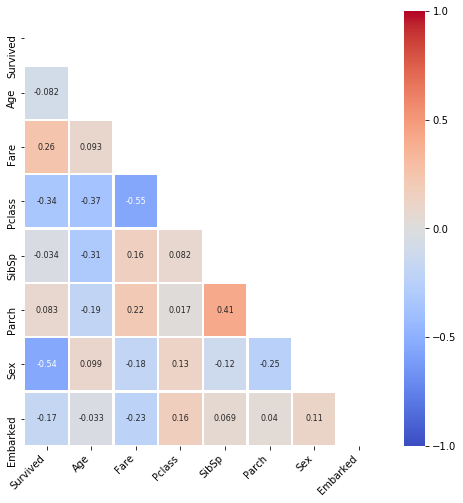

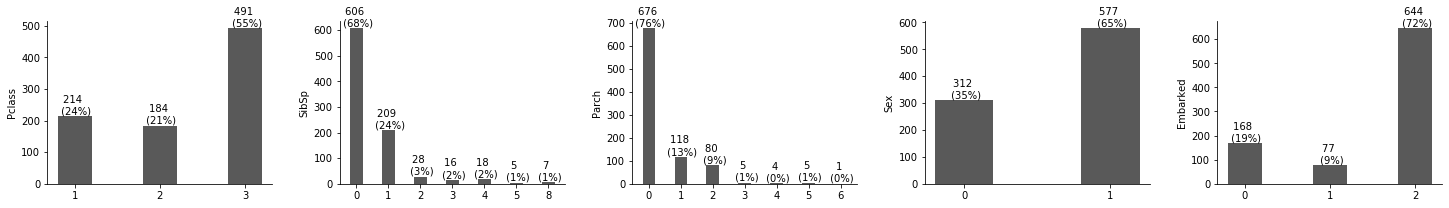

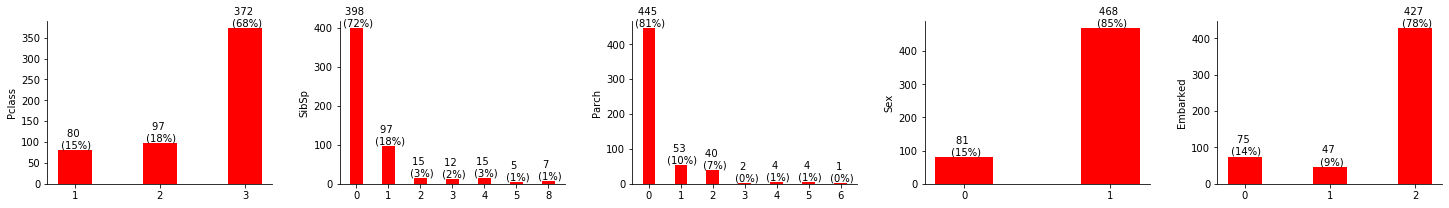

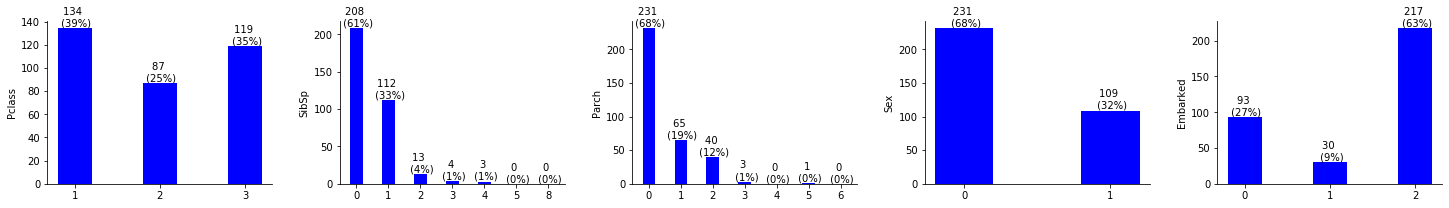

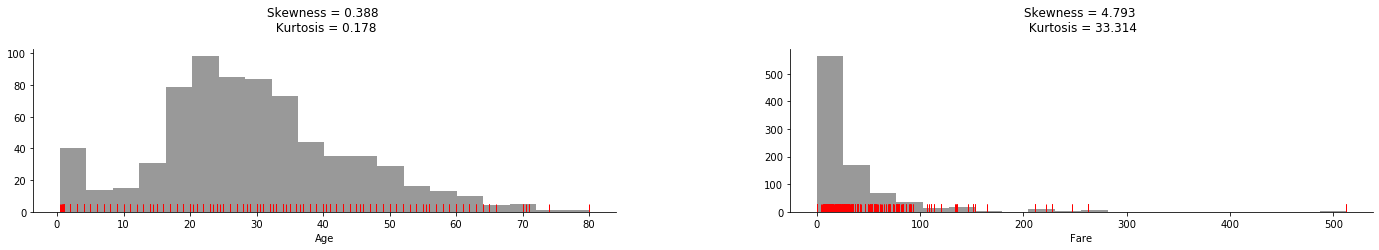

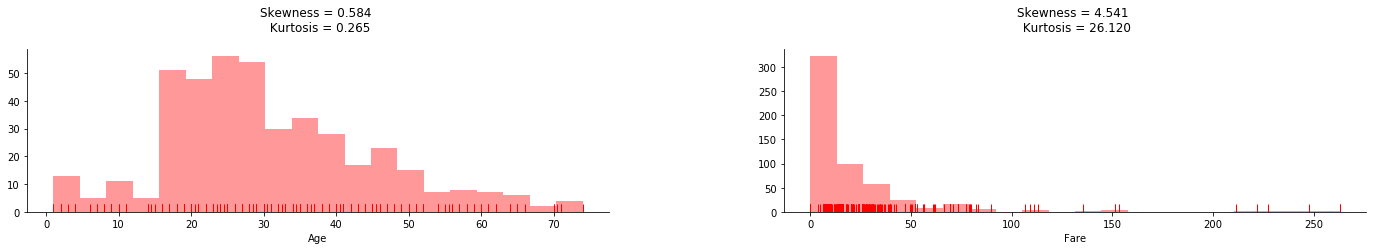

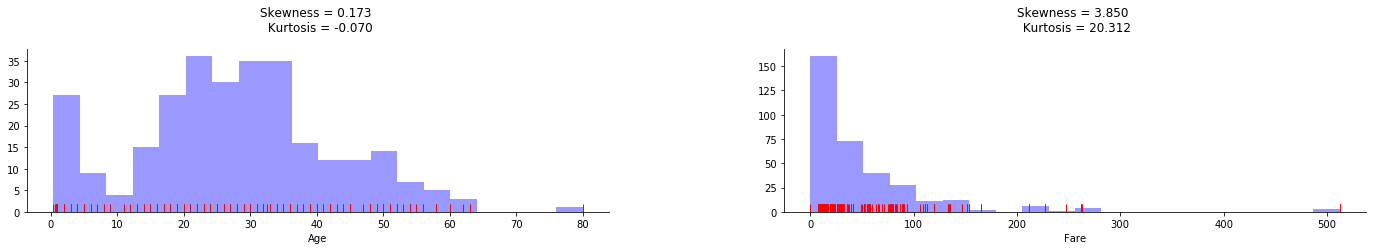

In [14]:
myplt = MyPlotter()

#plot correlation matrix
fig = plt.figure()
fig.set_size_inches(8, 8)
corr_matrix = data.corr()
myplt.plot_correlation_matrix(ax=fig.add_subplot(1,1,1),
                              data=corr_matrix,
                             cmap='coolwarm')


grd = list(data_cat.columns)
grd_n = len(grd)
grd_cols_n = 5
grd_rows_n = int(math.ceil(grd_n / grd_cols_n))

plt_h = 3
plt_w = 5

fig_ttl = plt.figure()
fig_ttl.set_size_inches(plt_w * grd_cols_n, 0.3)
ax0 = fig_ttl.add_subplot()
ax0.text(0.5, 0.5, 'Categorical Variables (all)', fontsize=14, horizontalalignment='center', verticalalignment='center')
ax0.axis('off')

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.3, hspace=0.5)

for idx, col in enumerate(data_cat.columns):
    freq = []
    frc = []
    for i in np.sort(data_cat[col].unique()):
        n = len(data.loc[data[col]==i, col].index)
        fr = n / len(data.index)
        freq.append([n])
        frc.append([fr])

    df_freq = pd.DataFrame(freq, columns=['all'], index=np.sort(data_cat[col].unique())).T
    df_frc = pd.DataFrame(frc, columns=['all'], index=data_cat[col].unique()).T
    labs = ['{0:d} \n ({1:.0%})'.format(i,j) for i, j in zip(df_freq.loc['all'], df_frc.loc['all'])]
    myplt.plot_bar_diagram(ax=fig.add_subplot(gs[idx]),
                           data=df_freq,
                           bar_labels=[labs],
                           plots_labels=None,
                           plots_colors=['0.35'],
                           title=None,
                           length_label=col,
                           orient='v',
                           spines={'top': False, 'right': False})

fig_ttl = plt.figure()
fig_ttl.set_size_inches(plt_w * grd_cols_n, 0.3)
ax0 = fig_ttl.add_subplot()
ax0.text(0.5, 0.5, 'Categorical Variables (non-survivals)', fontsize=14, horizontalalignment='center', verticalalignment='center')
ax0.axis('off')

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.3, hspace=0.5)

for idx, col in enumerate(data_cat.columns):
    freq = []
    frc = []
    for i in np.sort(data_cat[col].unique()):
        n0 = len(data.loc[(data['Survived']==0) & (data[col]==i), col].index)
        fr0 = n0 / N_surv0
        freq.append([n0])
        frc.append([fr0])

    df_freq = pd.DataFrame(freq, columns=['non_survivals'], index=np.sort(data_cat[col].unique())).T
    df_frc = pd.DataFrame(frc, columns=['non_survivals'], index=data_cat[col].unique()).T
    labs0 = ['{0:d} \n ({1:.0%})'.format(i,j) for i, j in zip(df_freq.loc['non_survivals'], df_frc.loc['non_survivals'])]
    myplt.plot_bar_diagram(ax=fig.add_subplot(gs[idx]),
                           data=df_freq,
                           bar_labels=[labs0],
                           plots_labels=None,
                           plots_colors=['r'],
                           title=None,
                           length_label=col,
                           orient='v',
                           spines={'top': False, 'right': False})
    
fig_ttl = plt.figure()
fig_ttl.set_size_inches(plt_w * grd_cols_n, 0.3)
ax0 = fig_ttl.add_subplot()
ax0.text(0.5, 0.5, 'Categorical Variables (survivals)', fontsize=14, horizontalalignment='center', verticalalignment='center')
ax0.axis('off')

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.3, hspace=0.5)

for idx, col in enumerate(data_cat.columns):
    freq = []
    frc = []
    for i in np.sort(data_cat[col].unique()):
        n1 = len(data.loc[(data['Survived']==1) & (data[col]==i), col].index)
        fr1 = n1 / N_surv1
        freq.append([n1])
        frc.append([fr1])

    df_freq = pd.DataFrame(freq, columns=['survivals'], index=np.sort(data_cat[col].unique())).T
    df_frc = pd.DataFrame(frc, columns=['survivals'], index=data_cat[col].unique()).T
    labs1 = ['{0:d} \n ({1:.0%})'.format(i,j) for i, j in zip(df_freq.loc['survivals'], df_frc.loc['survivals'])]
    myplt.plot_bar_diagram(ax=fig.add_subplot(gs[idx]),
                           data=df_freq,
                           bar_labels=[labs1],
                           plots_labels=None,
                           plots_colors=['b'],
                           title=None,
                           length_label=col,
                           orient='v',
                           spines={'top': False, 'right': False})
    

    
grd = list(data_num.columns)
grd_n = len(grd)
grd_cols_n = 2
grd_rows_n = int(math.ceil(grd_n / grd_cols_n))

plt_h = 3
plt_w = 12

fig_ttl = plt.figure()
fig_ttl.set_size_inches(plt_w * grd_cols_n, 0.3)
ax0 = fig_ttl.add_subplot()
ax0.text(0.5, 0.5, 'Numerical Variables (all)', fontsize=14, horizontalalignment='center', verticalalignment='center')
ax0.axis('off')

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.3, hspace=0.5)

for idx, col in enumerate(data_num.columns):
    fig.add_subplot(gs[idx])
    df = data[col].dropna()
    ax = sns.distplot(df,
                 bins=20, kde=False, norm_hist=False, rug=True, 
                 rug_kws={'color':'r'},
                 hist_kws={'histtype':'bar', 'linewidth': 3, 'color': "0"})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    skewness = '{0:.3f}'.format(sts.skew(df.values))
    kurtosis = '{0:.3f}'.format(sts.kurtosis(df.values))
    ttl = ax.title
    ttl.set_position([.5, 1.07])
    ax.set_title('Skewness = {0} \n Kurtosis = {1}'.format(skewness, kurtosis))
    
fig_ttl = plt.figure()
fig_ttl.set_size_inches(plt_w * grd_cols_n, 0.3)
ax0 = fig_ttl.add_subplot()
ax0.text(0.5, 0.5, 'Numerical Variables (NON-SURVIVALS)', fontsize=14, horizontalalignment='center', verticalalignment='center')
ax0.axis('off')

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.3, hspace=0.5)

for idx, col in enumerate(data_num.columns):
    fig.add_subplot(gs[idx])
    df = data.loc[data['Survived']==0, col].dropna()
    ax = sns.distplot(df,
                 bins=20, kde=False, norm_hist=False, rug=True, 
                 rug_kws={'color':'r'},
                 hist_kws={'histtype':'bar', 'linewidth': 3, 'color': "r"})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    skewness = '{0:.3f}'.format(sts.skew(df.values))
    kurtosis = '{0:.3f}'.format(sts.kurtosis(df.values))
    ttl = ax.title
    ttl.set_position([.5, 1.07])
    ax.set_title('Skewness = {0} \n Kurtosis = {1}'.format(skewness, kurtosis))
    
fig_ttl = plt.figure()
fig_ttl.set_size_inches(plt_w * grd_cols_n, 0.3)
ax0 = fig_ttl.add_subplot()
ax0.text(0.5, 0.5, 'Numerical Variables (SURVIVALS)', fontsize=14, horizontalalignment='center', verticalalignment='center')
ax0.axis('off')

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.3, hspace=0.5)

for idx, col in enumerate(data_num.columns):
    fig.add_subplot(gs[idx])
    df = data.loc[data['Survived']==1, col].dropna()
    ax = sns.distplot(df,
                 bins=20, kde=False, norm_hist=False, rug=True, 
                 rug_kws={'color':'r'},
                 hist_kws={'histtype':'bar', 'linewidth': 3, 'color': "b"})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    skewness = '{0:.3f}'.format(sts.skew(df.values))
    kurtosis = '{0:.3f}'.format(sts.kurtosis(df.values))
    ttl = ax.title
    ttl.set_position([.5, 1.07])
    ax.set_title('Skewness = {0} \n Kurtosis = {1}'.format(skewness, kurtosis))


In [15]:
#Concatinate train & test data
data_tot = pd.concat([data_train, data_test], ignore_index=True)
# data_tot

In [16]:
#encoding Name
def name_encoder(data):
    data_encoded = []
    for i in data['Name']:
        lname0 = i.split(',')[0].strip() #last name
        ttl = i.split(',')[1].split('.')[0].strip() #title
        lname1 = (i.split('(')[-1].split(')')[0].split()[-1].strip() if '(' in i else '').replace('\"','') #second last name
        data_encoded.append([lname0, lname1, ttl])
    data_encoded = pd.DataFrame(data_encoded, columns=['lname0', 'lname1', 'ttl'], index=data.index)
    return pd.concat([data.reset_index(), data_encoded], axis=1).drop(columns=['index'])

In [17]:
data_tot = name_encoder(data_tot)
data_tot

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lname0,lname1,ttl
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Thayer,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Peel,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,,Mr


In [18]:
#unique titles
ttl = data_tot['ttl'].unique()
#counts
ttl = [[i, len(data_tot.loc[data_tot['ttl']==i])] for i in ttl]
#to DataFrame
ttl = pd.DataFrame(ttl, columns=['ttl', 'ttl_n'])
ttl

,ttl,ttl_n
0,Mr,757
1,Mrs,197
2,Miss,260
3,Master,61
4,Don,1
5,Rev,8
6,Dr,8
7,Mme,1
8,Ms,2
9,Major,2


In [19]:
data_tot.loc[data_tot['ttl']=='Dr']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lname0,lname1,ttl
245,246,0.0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,Minahan,,Dr
317,318,0.0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,Moraweck,,Dr
398,399,0.0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,Pain,,Dr
632,633,1.0,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,Stahelin-Maeglin,,Dr
660,661,1.0,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,Frauenthal,,Dr
766,767,0.0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,Brewe,,Dr
796,797,1.0,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Leader,Farnham,Dr
1184,1185,NaN,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S,Dodge,,Dr


### There is only one woman Dr

In [20]:
def title_encoder(data):
    mask = {'Don':'Mr',
            'Sir':'Mr',
            'Jonkheer':'Mr',
            'Mme':'Mrs',
            'Lady':'Mrs',
            'the Countess':'Mrs',
            'Dona':'Mrs',
            'Mlle':'Miss',
            'Ms':'Miss',
            'Major':'Mr',
            'Col':'Mr',
            'Capt':'Mr',
            'Rev':'Mr',
            'Dr':'Mr'}
    
    df = data['ttl'].apply(lambda i: mask[i] if i in mask else i)
    data = pd.concat([data.drop(columns=['ttl']), df], axis=1)
    if 797 in data['PassengerId'].values:
        data.loc[data_tot['PassengerId']==797, 'ttl'] = 'Mrs'
    mask = {'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4}
    df = data['ttl'].apply(lambda i: mask[i])
    return pd.concat([data.drop(columns=['ttl']), df], axis=1)

In [21]:
data_tot = title_encoder(data_tot)
data_tot

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lname0,lname1,ttl
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Thayer,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Peel,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,,2
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,,1


In [22]:
data_tot.loc[data_tot['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lname0,lname1,ttl
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Icard,,3
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Stone,Evelyn,2


In [23]:
df = data_tot.query('Ticket.str.contains("1135")')
df.sort_values(by='Ticket')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lname0,lname1,ttl
782,783,0.0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0000,D6,S,Long,,1
377,378,0.0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,Widener,,1
965,966,NaN,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C130,C,Geiger,,3
966,967,NaN,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C,Keeping,,1
1109,1110,NaN,1,"Widener, Mrs. George Dunton (Eleanor Elkins)",female,50.0,1,1,113503,211.5000,C80,C,Widener,Elkins,2
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,Widener,,1
166,167,1.0,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,Chibnall,Bowerman,2
356,357,1.0,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S,Bowerman,,3
54,55,0.0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,Ostby,,1
917,918,NaN,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,Ostby,,3


In [24]:
nc = len(df.loc[df['Embarked']=='C'])
ns = len(df.loc[df['Embarked']=='S'])
n = len(df.index)

print('C: %d' % nc)
print('S: %d' % ns)
print('All: %d' % n)

C: 7
S: 5
All: 14


### So assigning both to C

In [25]:
#Encoding 'Embarked'
def embarked_encoder(data):
    if len(data.loc[data['Embarked'].isnull()].index)>0:
        data = data.fillna(value={'Embarked':'C'})
    mask = {'C':1, 'S':2, 'Q':3}
    df = data['Embarked'].apply(lambda i: mask[i])
    return pd.concat([data.drop(columns=['Embarked']), df], axis=1)

In [26]:
data_tot = embarked_encoder(data_tot)
data_tot

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,lname0,lname1,ttl,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Braund,,1,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cumings,Thayer,2,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Heikkinen,,3,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Futrelle,Peel,2,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Allen,,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,Spector,,1,2
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,Oliva y Ocana,,2,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Saether,,1,2
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,Ware,,1,2


### Grouping by ticket ID

In [27]:
def clean_text(text):
    text = ''.join([c for c in text if c not in string.punctuation]).strip()
    text = ''.join(text.split())
    return text

In [28]:
#encoding Ticket
def ticket_encoder(data):
    df = data['Ticket'].apply(lambda i: clean_text(i)).to_frame()
    data = pd.concat([data.drop(columns=['Ticket']).reset_index(), df], axis=1)
    return data.drop(columns=['index'])

In [29]:
data_tot = ticket_encoder(data_tot)
data_tot

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,lname0,lname1,ttl,Embarked,Ticket
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,Braund,,1,2,A521171
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,Cumings,Thayer,2,1,PC17599
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,Heikkinen,,3,2,STONO23101282
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,Futrelle,Peel,2,2,113803
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,Allen,,1,2,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,Spector,,1,2,A53236
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,Oliva y Ocana,,2,1,PC17758
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,Saether,,1,2,SOTONOQ3101262
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,Ware,,1,2,359309


In [30]:
data_tot.loc[data_tot['Ticket']=='PC17608']



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,lname0,lname1,ttl,Embarked,Ticket
311,312,1.0,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,262.375,B57 B59 B63 B66,Ryerson,,3,1,PC17608
742,743,1.0,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,262.375,B57 B59 B63 B66,Ryerson,,3,1,PC17608
915,916,NaN,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,262.375,B57 B59 B63 B66,Ryerson,Borie,2,1,PC17608
950,951,NaN,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,262.375,B61,Chaudanson,,3,1,PC17608
955,956,NaN,1,"Ryerson, Master. John Borie",male,13.0,2,2,262.375,B57 B59 B63 B66,Ryerson,,4,1,PC17608
1033,1034,NaN,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,262.375,B57 B59 B63 B66,Ryerson,,1,1,PC17608
1266,1267,NaN,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,262.375,NaN,Bowen,,3,1,PC17608


#### Прислуга!!!

In [31]:
def grps_by_size(grp):
    #group size > 1
    grp1 = None
    #group size == 1
    grp0 = None
    for g in grp.groups:
        grp_ = grp.get_group(g)
        if len(grp.get_group(g).index)>1:
            if grp1 is None:
                grp1 = grp_
            else:
                grp1 = pd.concat([grp1, grp_])
        else:
            if grp0 is None:
                grp0 = grp_
            else:
                grp0 = pd.concat([grp0, grp_])
    return (grp0, grp1)

In [32]:
print('Unique tickets: %d' % len(data_tot['Ticket'].unique()))
print('Non-unique tickets: %d' % (len(data_tot.index) - len(data_tot['Ticket'].unique())))

Unique tickets: 929
Non-unique tickets: 380


In [33]:
families0 = data_tot.loc[(data_tot['SibSp']>0) & (data_tot['Parch']==0)]
families1 = data_tot.loc[data_tot['Parch']>0]
singles = data_tot.loc[(data_tot['SibSp']==0) & (data_tot['Parch']==0)]

In [34]:
#singles
sig_grp = singles.groupby('Ticket')
#families NO children
fam0_grp = families0.groupby('Ticket')
#families w/children
fam1_grp = families1.groupby('Ticket')

#no family, unique ticket
sig0 = grps_by_size(sig_grp)[0]
#no family, matching tickets
sig1 = grps_by_size(sig_grp)[1]
#has family, no children, unique ticket
fam0 = grps_by_size(fam0_grp)[0]
#has family, no children, matching ticket
fam1 = grps_by_size(fam0_grp)[1]
#has family, has children, unique ticket
famch0 = grps_by_size(fam1_grp)[0]
#has family, has children, matching ticket
famch1 = grps_by_size(fam1_grp)[1]

print('Singles-----------------------')
print('Matching tickets groups: %d' % len(sig1.index))
print('Unique tickets groups: %d' % len(sig0.index))
print('------------------------------')

print('Families-----------------------')
print('Matching tickets groups: %d' % len(fam1.index))
print('Unique tickets groups: %d' % len(fam0.index))
print('------------------------------')

print('Families W/children-----------------------')
print('Matching tickets groups: %d' % len(famch1.index))
print('Unique tickets groups: %d' % len(famch0.index))
print('------------------------------')

Singles-----------------------
Matching tickets groups: 108
Unique tickets groups: 682
------------------------------
Families-----------------------
Matching tickets groups: 174
Unique tickets groups: 38
------------------------------
Families W/children-----------------------
Matching tickets groups: 288
Unique tickets groups: 19
------------------------------


In [35]:
#Familie groups
fam_grps = [sig0, sig1, fam0, fam1, famch0, famch1]

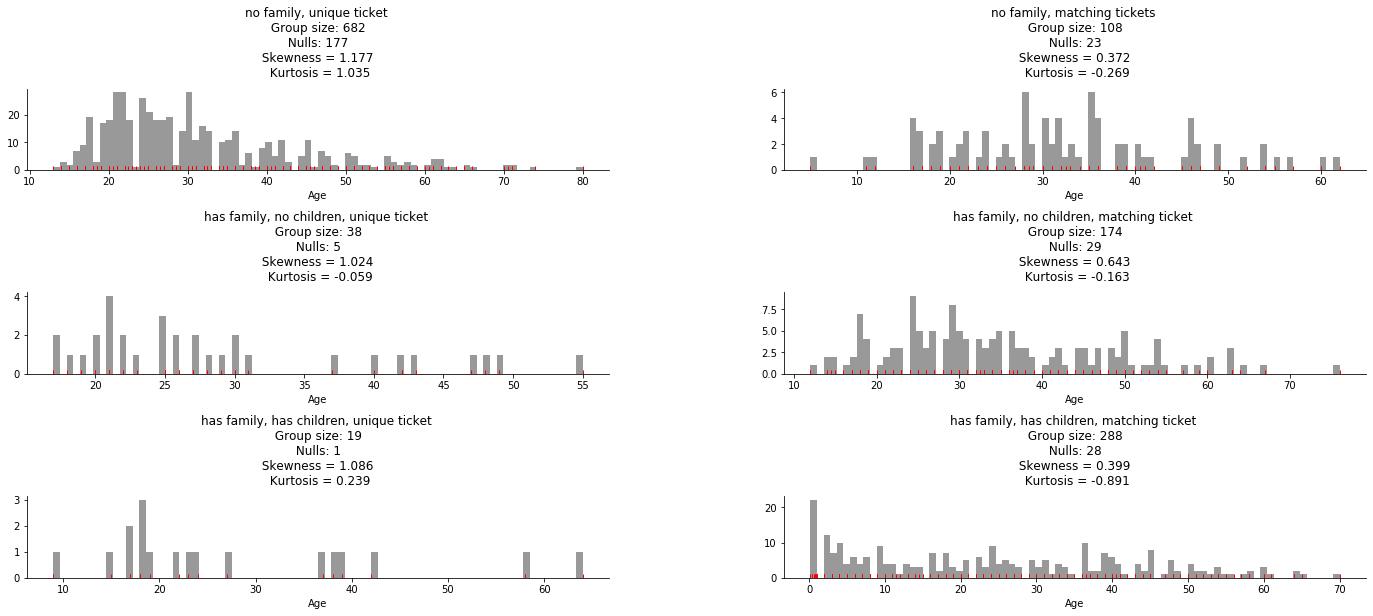

In [36]:
# grd = list(data_num.columns)
# grd_n = len(grd)
grd_cols_n = 2
grd_rows_n = 3

plt_h = 3
plt_w = 12

fig_ttl = plt.figure()
fig_ttl.set_size_inches(plt_w * grd_cols_n, 0.3)
ax0 = fig_ttl.add_subplot()
ax0.text(0.5, 0.5, 'Age Distribution by Family Groups', fontsize=14, horizontalalignment='center', verticalalignment='center')
ax0.axis('off')

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.3, hspace=1.5)

for i, ttl in zip(enumerate(fam_grps), 
                   ['no family, unique ticket', 
                    'no family, matching tickets', 
                    'has family, no children, unique ticket', 
                    'has family, no children, matching ticket', 
                    'has family, has children, unique ticket', 
                    'has family, has children, matching ticket']):
    idx = i[0]
    df = i[1]
    nulls = df['Age'].isnull().sum()
    fig.add_subplot(gs[idx])
    df = df['Age'].dropna()
#     df = df.apply(np.log)
    ax = sns.distplot(df,
                 bins=80, kde=False, norm_hist=False, rug=True, 
                 rug_kws={'color':'r'},
                 hist_kws={'histtype':'bar', 'linewidth': 3, 'color': "0"})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    grp_n = len(i[1].index)
    skewness = '{0:.3f}'.format(sts.skew(df.values))
    kurtosis = '{0:.3f}'.format(sts.kurtosis(df.values))
    t = ax.title
    t.set_position([.5, 1.07])
    ax.set_title('{0} \n Group size: {1} \n Nulls: {2} \n Skewness = {3} \n Kurtosis = {4}'.format(ttl, grp_n, nulls, skewness, kurtosis))

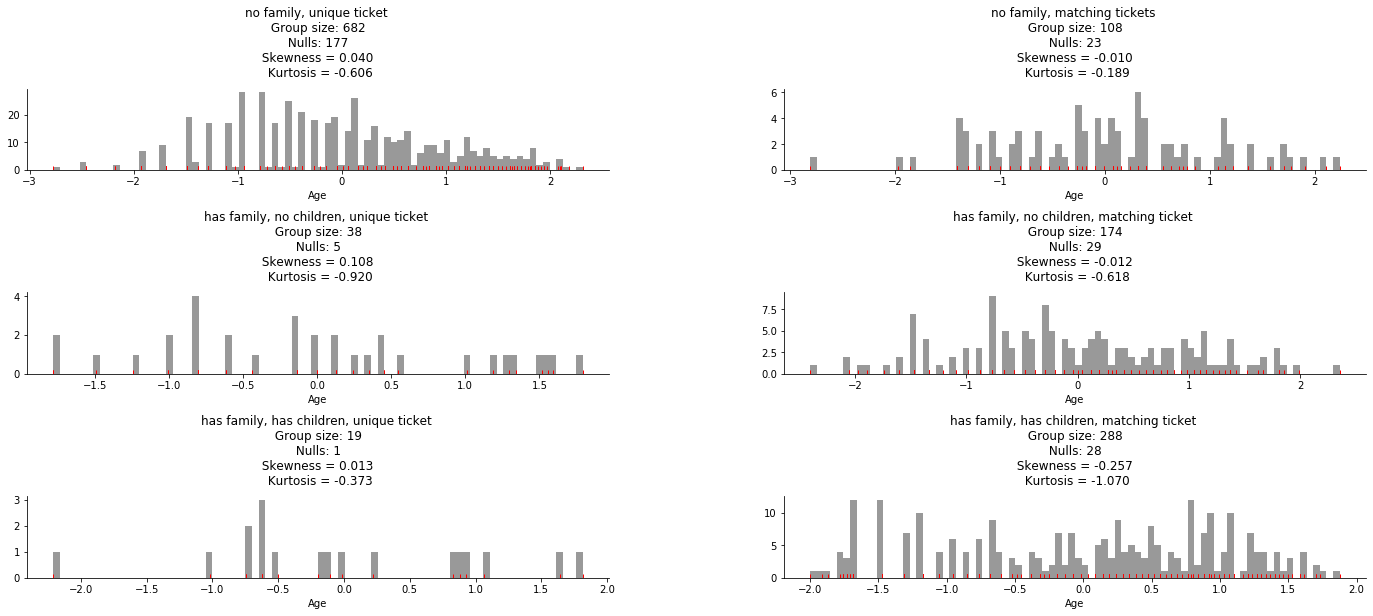

In [37]:
pt_age = prepc.PowerTransformer(method='box-cox', standardize=True)
# grd = list(data_num.columns)
# grd_n = len(grd)
grd_cols_n = 2
grd_rows_n = 3

plt_h = 3
plt_w = 12

fig_ttl = plt.figure()
fig_ttl.set_size_inches(plt_w * grd_cols_n, 0.3)
ax0 = fig_ttl.add_subplot()
ax0.text(0.5, 0.5, 'Age Distribution by Family Groups', fontsize=14, horizontalalignment='center', verticalalignment='center')
ax0.axis('off')

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.3, hspace=1.5)

# tot_grps = 0
for i, ttl in zip(enumerate(fam_grps), 
                   ['no family, unique ticket', 
                    'no family, matching tickets', 
                    'has family, no children, unique ticket', 
                    'has family, no children, matching ticket', 
                    'has family, has children, unique ticket', 
                    'has family, has children, matching ticket']):
#     tot_grps += len(i[1].index)
    idx = i[0]
    df = i[1]
    nulls = df['Age'].isnull().sum()
    fig.add_subplot(gs[idx])
    df = df['Age'].dropna()
    df = pt_age.fit_transform(np.array(df).reshape(-1,1))
    df = pd.Series(df.reshape(len(df)), name='Age')
#     df = df.apply(np.log)
    ax = sns.distplot(df,
                 bins=80, kde=False, norm_hist=False, rug=True, 
                 rug_kws={'color':'r'},
                 hist_kws={'histtype':'bar', 'linewidth': 3, 'color': "0"})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    grp_n = len(i[1].index)
    skewness = '{0:.3f}'.format(sts.skew(df.values))
    kurtosis = '{0:.3f}'.format(sts.kurtosis(df.values))
    t = ax.title
    t.set_position([.5, 1.07])
    ax.set_title('{0} \n Group size: {1} \n Nulls: {2} \n Skewness = {3} \n Kurtosis = {4}'.format(ttl, grp_n, nulls, skewness, kurtosis))
# print(tot_grps)
# print(len(data_tot.index))

In [38]:
#Encoding familie groups
def familie_groups_encoder(data, fam_grps):
    data['fgrp'] = 0
    for idx, grp in enumerate(fam_grps):
#         grp['fgrp'] = idx + 1
        for pid in grp['PassengerId']:
            data.loc[data['PassengerId']==pid, 'fgrp'] = idx + 1
    return data

In [39]:
#Encode 'Fare'
def fare_encoder(data, encode_grps):
    for grp in encode_grps:
        fare = grp['Fare'].values[0] / len(grp.index)
        grp['Fare'] = fare
        for pid in grp['PassengerId']:
            if pid in data['PassengerId']:
                data.loc[data['PassengerId']==pid, 'Fare'] = fare
    if len(data.loc[data['Fare'].isnull()])>0:
        for pid in data.loc[data['Fare'].isnull(), 'PassengerId']:
            c = data.loc[data['PassengerId']==pid, 'Pclass'].values[0]
            data.loc[data['PassengerId']==pid, 'Fare'] = np.mean(data.loc[data['Pclass']==c, 'Fare'])
    return data

In [40]:
#Encoding 'Sex'
def sex_encoder(data):
    mask = {'male':1, 'female':2}
    df = data['Sex'].apply(lambda i: mask[i])
    return pd.concat([data.drop(columns=['Sex']), df], axis=1)

In [41]:
#Adding 'Familie size'
def fam_size(data):
    data['famsize'] = data['SibSp'] + data['Parch'] + 1
    return data

In [42]:
data_tot = familie_groups_encoder(data_tot, fam_grps)
data_tot = fare_encoder(data_tot, [sig1, fam1, famch1])
data_tot = sex_encoder(data_tot)
data_tot = fam_size(data_tot)

In [43]:
data_tot

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,lname0,lname1,ttl,Embarked,Ticket,fgrp,Sex,famsize
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.250000,NaN,Braund,,1,2,A521171,3,1,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,0.432471,C85,Cumings,Thayer,2,1,PC17599,4,2,2
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,7.925000,NaN,Heikkinen,,3,2,STONO23101282,1,2,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,0.432471,C123,Futrelle,Peel,2,2,113803,4,2,2
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,8.050000,NaN,Allen,,1,2,373450,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",NaN,0,0,8.050000,NaN,Spector,,1,2,A53236,1,1,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,108.900000,C105,Oliva y Ocana,,2,1,PC17758,1,2,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,7.250000,NaN,Saether,,1,2,SOTONOQ3101262,1,1,1
1307,1308,NaN,3,"Ware, Mr. Frederick",NaN,0,0,8.050000,NaN,Ware,,1,2,359309,1,1,1


### Preparing Data for 'Age' prediction

In [44]:
def param_tune(model, X_train, y_train, param_ranges, scoring, cv, refit=''):
    if refit == '': refit = list(scoring.keys())[0]
    gsearch = GridSearchCV(estimator=model, param_grid=param_ranges, scoring=scoring, cv=cv, refit=refit,
                           n_jobs=-1)
    gsearch.fit(X_train, y_train)
    cv_res = pd.DataFrame(gsearch.cv_results_)
    cv_res_sel = []
    for i in list(scoring.keys()):
        cv_res_sel.append(
            cv_res.loc[cv_res['rank_test_%s' % i] == 1, ['mean_test_%s' % i, 'std_test_%s' % i]].values[0])

    #                 print(cv_res_sel)
    cv_res_sel = pd.DataFrame(cv_res_sel, index=list(scoring.keys()), columns=['mean', 'std'])
    cv_results = cv_res_sel.T
    cv_results = cv_results.apply(lambda i: np.absolute(i))
    return gsearch.best_estimator_, gsearch.best_params_, gsearch.best_score_, cv_results

In [45]:
def cv_rep(model, X, y, cv, scoring):
    cv_res = model_selection.cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1)
    cv_res = [[np.mean(cv_res['test_%s' % i]), np.std(cv_res['test_%s' % i])] for i in list(scoring.keys())]
    cv_results = pd.DataFrame(cv_res, index=list(scoring.keys()), columns=['mean', 'std'])
    cv_results = cv_results.T
    cv_results = cv_results.apply(lambda i: np.absolute(i))
    return cv_results

In [46]:
def base_models_predictions(models, X):
    X1 = None
    for model in models:
        if X1 is None:
            X1 = pd.Series(model.predict(X), name=model.__class__.__name__).to_frame()
        else:
            X1 = X1.merge(pd.Series(model.predict(X), name=model.__class__.__name__).to_frame(), left_index=True, right_index=True)
    return X1

In [47]:
data = data_tot[data_tot['Age'].notna()]
data = data[['Age', 'Fare', 'Pclass', 'Sex', 'ttl', 'fgrp', 'famsize', 'Embarked']].reset_index().drop(columns=['index'])

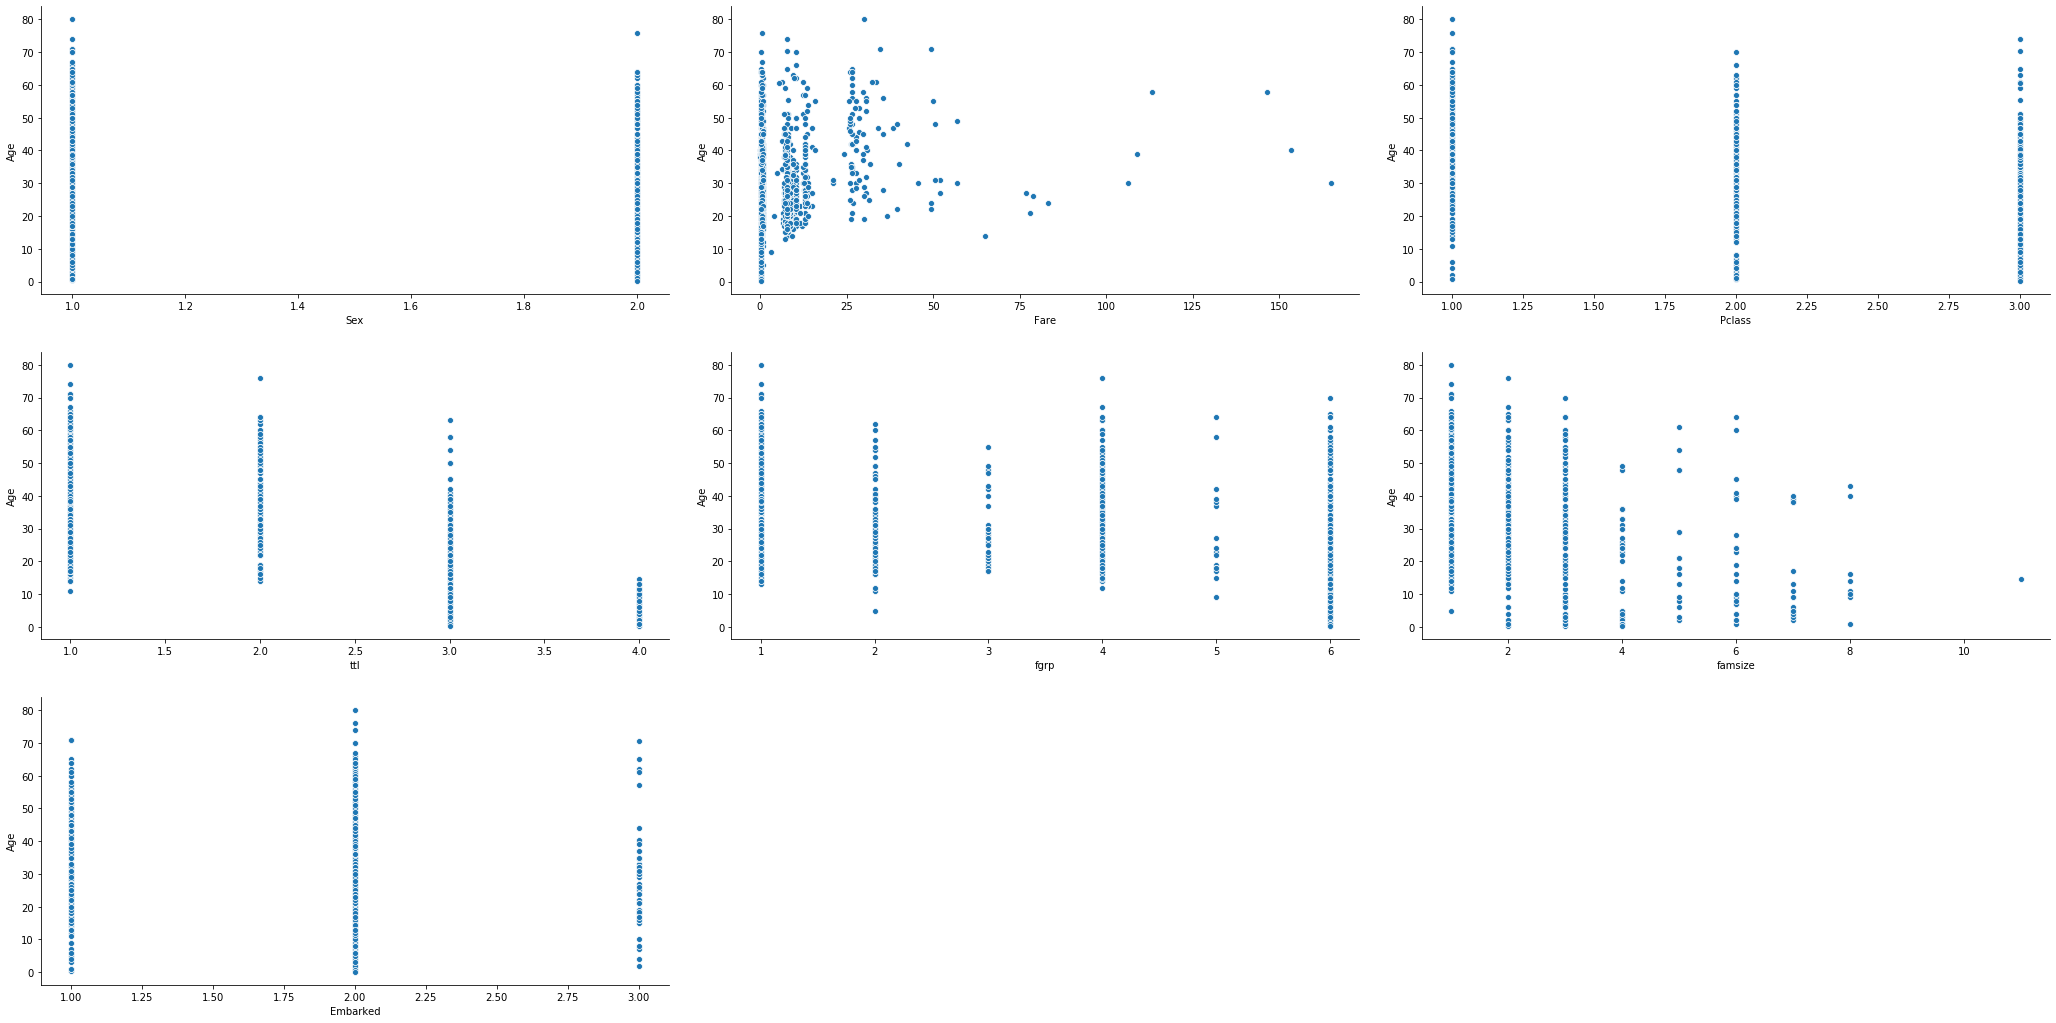

In [48]:
grd_cols_n = 3
grd_rows_n = 3

plt_h = 6
plt_w = 12

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.1, hspace=0.2)

for idx, i in enumerate(['Sex', 'Fare', 'Pclass', 'ttl', 'fgrp', 'famsize', 'Embarked']):
    fig.add_subplot(gs[idx])
    ax = sns.scatterplot(x=i, y='Age', data=data)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [49]:
# len(data.loc[data['Fare']>60].index)

In [50]:
# len(data.loc[data['Fare']==0].index)

In [51]:
# np.min(data.loc[data['Pclass']==3, 'Fare'].values)

In [52]:
# data.loc[data['Fare']==0, 'Fare'] = np.min(data.loc[data['Pclass']==3, 'Fare'].values) / 2

In [53]:
# data1 = data.loc[data['Fare']<60]

In [54]:
# grd_cols_n = 3
# grd_rows_n = 3

# plt_h = 6
# plt_w = 12

# fig = plt.figure()
# fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
# gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.1, hspace=0.2)

# for idx, i in enumerate(['Sex', 'Fare', 'Pclass', 'ttl', 'fgrp', 'famsize', 'Embarked']):
#     fig.add_subplot(gs[idx])
#     ax = sns.scatterplot(x=i, y='Age', data=data)
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)

In [55]:
#Transform 'Fare'
c = data['Fare'].apply(lambda i: np.log(i+1)).to_frame()
data = data.drop(columns='Fare')
data = pd.concat([data, c], axis=1)
kbd = prepc.KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='kmeans')
c = pd.DataFrame(kbd.fit_transform(np.array(data['Fare']).reshape(-1,1)), columns=['Fare'])
data = pd.concat([data.drop(columns=['Fare']).reset_index(), c], axis=1).drop(columns='index')

In [56]:
#Transform 'Age'
c = pd.DataFrame(pt_age.fit_transform(np.array(data['Age']).reshape(-1,1)), columns=['Age'])
data = pd.concat([data.drop(columns=['Age']).reset_index(), c], axis=1).drop(columns='index')

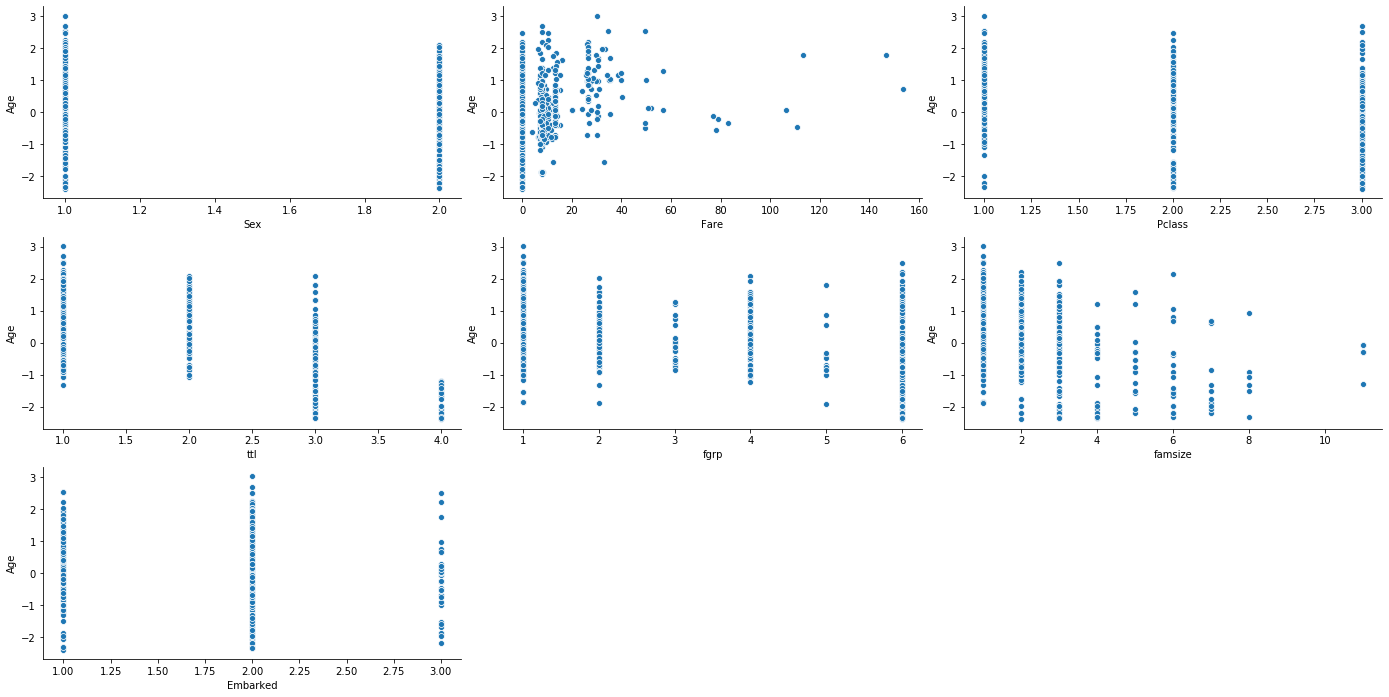

In [184]:
grd_cols_n = 3
grd_rows_n = 3

plt_h = 4
plt_w = 8

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.1, hspace=0.2)

for idx, i in enumerate(['Sex', 'Fare', 'Pclass', 'ttl', 'fgrp', 'famsize', 'Embarked']):
    fig.add_subplot(gs[idx])
    ax = sns.scatterplot(x=i, y='Age', data=data)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

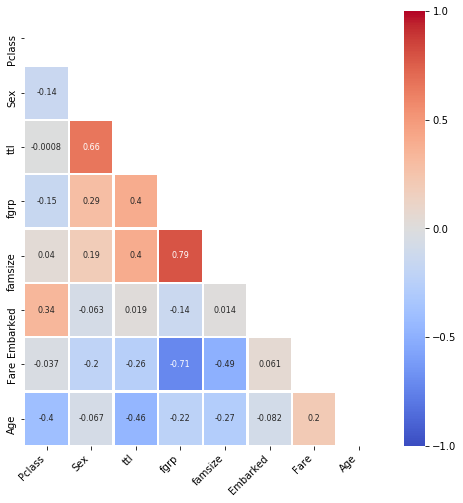

In [58]:
#plot correlation matrix
fig = plt.figure()
fig.set_size_inches(8, 8)
corr_matrix = data.corr()
myplt.plot_correlation_matrix(ax=fig.add_subplot(1,1,1),
                              data=corr_matrix,
                             cmap='coolwarm')

In [59]:
def dropcol_imp_r2_metric(model, X_valid, y_valid, sample_weights):
    model.fit(X_valid, y_valid)
    y_pred = model.predict(X_valid)
    return metrics.r2_score(y_valid, y_pred, sample_weight=sample_weights)

In [133]:
# train test split
X = data.drop(columns=['Age', 'Sex', 'fgrp', 'Embarked'])
y = data['Age']

In [134]:
#Train/Test split
X_train, X_test, y_train, y_test =model_selection.train_test_split(X, y, test_size=0.33, random_state=30)
#common random_state
random_state=30
#cross validation strategy
cv_folds = 5
n_repeats = 10
cv = model_selection.RepeatedKFold(n_splits=cv_folds, n_repeats=5, random_state=random_state)
#cross validation metrics
scoring = {'explained_variance':  'explained_variance',
           'r2': 'r2'}

#### Pipeline:

For all base estimators:
1. Initiate base estimator with base parameters
3. Tune parameters

For final estimator:

3. Get base estimators predictions
4. Tune final estimator parameters based on obtained base predictions

In [62]:
base_scores = {}

In [135]:
def train_best_model(model, param_ranges, X_train, y_train, X_test, y_test, scoring, cv, refit):
    model, best_params, best_score, cv_res = param_tune(model, X_train, y_train, param_ranges, scoring, cv, refit=refit)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    tes = metrics.r2_score(y_test, y_pred) 
    scores = [cv_res.loc['mean', refit],tes]
    print('Train set CV results \n {0} \n'.format(cv_res))
    print('Best parameters: {0} \n'.format(best_params))
    print('Test set score: {0}'.format(tes)) 
    return model, scores

In [136]:
def feature_importance(model, X_train, y_train, X_test, y_test, metric, sort='drop'):
    feature_importance_drop = dropcol_importances(model, X_train, y_train, X_valid=X_test, y_valid=y_test, metric=metric)
    feature_importance_premute = importances(model, X_valid=X_test, y_valid=y_test, metric=metric)
    feature_importance = feature_importance_drop.merge(feature_importance_premute, left_index=True, right_index=True)
    feature_importance.columns = ['drop', 'premute']
    feature_importance = feature_importance.eval('mean = (drop + premute)/2')
    return feature_importance.sort_values(by=sort ,ascending=False)

In [73]:
base_scores_adr = {}
base_scores_bgr = {}
base_scores_etr = {}
base_scores_rfr = {}
base_scores_rr = {}
fin_scores_etr = {}
fin_scores_rfr = {}

In [78]:
for r in [2,4,6,10,12,14,16,18,20]:
    print(r)
    cv = model_selection.RepeatedKFold(n_splits=cv_folds, n_repeats=r, random_state=random_state)
    
    abr = ens.AdaBoostRegressor()
    param_ranges = {'n_estimators': np.arange(5, 100, 20), 'learning_rate': np.linspace(0.001, 0.1, 20), 'loss': ['exponential']}
    abr, scores = train_best_model(abr, param_ranges, X_train, y_train, X_test, y_test, scoring, cv, refit='r2')
    base_scores_adr[r] = scores
    
    bgr = ens.BaggingRegressor(random_state=random_state, n_jobs=-1)
    param_ranges = {'n_estimators': np.arange(90, 200, 20), 'max_samples': np.arange(10, 500, 50)}
    bgr, scores = train_best_model(bgr, param_ranges, X_train, y_train, X_test, y_test, scoring, cv, refit='r2')
    base_scores_bgr[r] = scores
    
    etr = ens.ExtraTreesRegressor(random_state=random_state, n_jobs=-1)
    param_ranges = {'n_estimators': np.arange(5, 100, 20),
                    'max_depth': np.arange(3, 10), 
                    'min_samples_split': np.arange(2, 20, 19),
                    'min_samples_leaf': np.arange(1, 20, 20)}
    etr, scores = train_best_model(etr, param_ranges, X_train, y_train, X_test, y_test, scoring, cv, refit='r2')
    base_scores_etr[r] = scores
    
    rfr = ens.RandomForestRegressor(random_state=random_state, n_jobs=-1)
    param_ranges = {'n_estimators': np.arange(5, 100, 20),
                    'max_depth': np.arange(3, 10), 
                    'min_samples_split': np.arange(2, 20, 19),
                    'min_samples_leaf': np.arange(1, 20, 20)}
    rfr, scores = train_best_model(rfr, param_ranges, X_train, y_train, X_test, y_test, scoring, cv, refit='r2')
    base_scores_rfr[r] = scores
    
    rr = lm.Ridge(random_state=random_state)
    param_ranges = {'alpha': np.linspace(0.01, 10, 20), 'max_iter': np.arange(1,300, 30),}
    rr, scores = train_best_model(rr, param_ranges, X_train, y_train, X_test, y_test, scoring, cv, refit='r2')
    base_scores_rr[r] = scores
    
    base_models_age = [etr,rfr,abr,bgr,rr]
    X_train1 = base_models_predictions(base_models_age, X_train)
    X_test1 = base_models_predictions(base_models_age, X_test)
    
    final_model_age = ens.ExtraTreesRegressor(random_state=random_state, n_jobs=-1)
    param_ranges = {'n_estimators': np.arange(5, 100, 20),
                    'max_depth': np.arange(3, 10), 
                    'min_samples_split': np.arange(2, 20, 19),
                    'min_samples_leaf': np.arange(1, 20, 20)}
    final_model_age, scores = train_best_model(final_model_age, param_ranges, X_train1, y_train, X_test1, y_test, scoring, cv, refit='r2')
    fin_scores_etr[r] = scores
    
    final_model_age = ens.RandomForestRegressor(random_state=random_state, n_jobs=-1)
    param_ranges = {'n_estimators': np.arange(5, 100, 20),
                    'max_depth': np.arange(3, 10), 
                    'min_samples_split': np.arange(2, 20, 19),
                    'min_samples_leaf': np.arange(1, 20, 20)}
    final_model_age, scores = train_best_model(final_model_age, param_ranges, X_train1, y_train, X_test1, y_test, scoring, cv, refit='r2')
    fin_scores_rfr[r] = scores

2
4
6
10
12
14
16
18
20


In [81]:
pd.DataFrame(fin_scores_etr).T

,0,1
2,0.488673,0.532465
4,0.485348,0.537906
6,0.487266,0.539499
10,0.488098,0.539848
12,0.487383,0.538101
14,0.488112,0.536803
16,0.486645,0.538859
18,0.485351,0.535167
20,0.486063,0.536393


In [82]:
pd.DataFrame(fin_scores_rfr).T

,0,1
2,0.479870,0.530182
4,0.478564,0.530027
6,0.480658,0.530116
10,0.480043,0.532540
12,0.479464,0.531908
14,0.480167,0.532427
16,0.479269,0.531463
18,0.477568,0.531277
20,0.477895,0.532260


In [102]:
df_fin_scores_rfr = pd.DataFrame(fin_scores_rfr).T.reset_index()
df_fin_scores_etr = pd.DataFrame(fin_scores_etr).T.reset_index()
df_base_scores_adr = pd.DataFrame(base_scores_adr).T.reset_index()
df_base_scores_bgr = pd.DataFrame(base_scores_bgr).T.reset_index()
df_base_scores_etr = pd.DataFrame(base_scores_etr).T.reset_index()
df_base_scores_rfr = pd.DataFrame(base_scores_rfr).T.reset_index()
df_base_scores_rr = pd.DataFrame(base_scores_rr).T.reset_index()

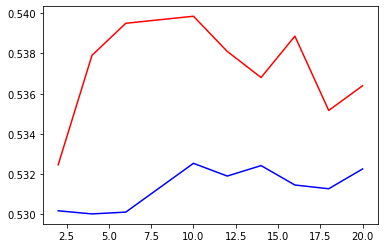

In [132]:
# grd_cols_n = 3
# grd_rows_n = 3

# plt_h = 6
# plt_w = 12

fig = plt.figure()
# fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
# # gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.1, hspace=0.2)


ax = fig.add_subplot(1,1,1)
# ax=sns.relplot(x='index', y=1, data=df_base_scores_rr, kind='line')
# ax=sns.relplot(x='index', y=1, data=df_base_scores_rfr, kind='line')
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
p= ax.plot(
           
           df_fin_scores_etr['index'], df_fin_scores_etr[1], 'r',
           df_fin_scores_rfr['index'], df_fin_scores_rfr[1], 'b',)
# ax.plot(df_base_scores_rfr['index'], df_base_scores_rfr[1])

In [137]:
abr = ens.AdaBoostRegressor()
param_ranges = {'n_estimators': np.arange(5, 100, 20), 'learning_rate': np.linspace(0.001, 0.1, 20), 'loss': ['exponential']}
abr, scores = train_best_model(abr, param_ranges, X_train, y_train, X_test, y_test, scoring, cv, refit='r2')
base_scores['abr'] = scores

Train set CV results 
       explained_variance        r2
mean            0.445187  0.441644
std             0.067951  0.064393 

Best parameters: {'learning_rate': 0.006210526315789474, 'loss': 'exponential', 'n_estimators': 65} 

Test set score: 0.5063850999360985


In [138]:
bgr = ens.BaggingRegressor(random_state=random_state, n_jobs=-1)
param_ranges = {'n_estimators': np.arange(90, 200, 20), 'max_samples': np.arange(10, 500, 50)}
bgr, scores = train_best_model(bgr, param_ranges, X_train, y_train, X_test, y_test, scoring, cv, refit='r2')
base_scores['bgr'] = scores

Train set CV results 
       explained_variance        r2
mean            0.451950  0.447864
std             0.059362  0.060439 

Best parameters: {'max_samples': 60, 'n_estimators': 150} 

Test set score: 0.5147511381575804


In [139]:
etr = ens.ExtraTreesRegressor(random_state=random_state, n_jobs=-1)
param_ranges = {'n_estimators': np.arange(5, 100, 20),
                'max_depth': np.arange(3, 10), 
                'min_samples_split': np.arange(2, 20, 19),
                'min_samples_leaf': np.arange(1, 20, 20)}
etr, scores = train_best_model(etr, param_ranges, X_train, y_train, X_test, y_test, scoring, cv, refit='r2')
base_scores['etr'] = scores

Train set CV results 
       explained_variance        r2
mean            0.462057  0.458833
std             0.063660  0.064361 

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 65} 

Test set score: 0.5305808824464902


In [140]:
rfr = ens.RandomForestRegressor(random_state=random_state, n_jobs=-1)
param_ranges = {'n_estimators': np.arange(5, 100, 20),
                'max_depth': np.arange(3, 10), 
                'min_samples_split': np.arange(2, 20, 19),
                'min_samples_leaf': np.arange(1, 20, 20)}
rfr, scores = train_best_model(rfr, param_ranges, X_train, y_train, X_test, y_test, scoring, cv, refit='r2')
base_scores['rfr'] = scores

Train set CV results 
       explained_variance        r2
mean            0.459119  0.456035
std             0.061225  0.061558 

Best parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 65} 

Test set score: 0.5302487654259


In [155]:
rr = lm.Ridge(random_state=random_state)
param_ranges = {'alpha': np.linspace(0.01, 10, 20)}
rr, scores = train_best_model(rr, param_ranges, X_train, y_train, X_test, y_test, scoring, cv, refit='r2')
base_scores['rr'] = scores

Train set CV results 
       explained_variance        r2
mean            0.351720  0.348254
std             0.060008  0.059217 

Best parameters: {'alpha': 7.8968421052631586} 

Test set score: 0.38647607034424736


In [142]:
feature_importance(abr, X_train, y_train, X_test, y_test, metric=dropcol_imp_r2_metric, sort='drop')

,drop,premute,mean
Feature,,,
ttl,0.258417,0.254528,0.256472
Pclass,0.051566,0.046569,0.049067
famsize,0.017012,0.021504,0.019258
Fare,0.002437,0.005889,0.004163


In [143]:
feature_importance(bgr, X_train, y_train, X_test, y_test, metric=dropcol_imp_r2_metric, sort='drop')

,drop,premute,mean
Feature,,,
ttl,0.265014,0.238373,0.251694
Pclass,0.052069,0.033519,0.042794
famsize,0.025710,0.012813,0.019261
Fare,0.010418,-0.007095,0.001662


In [144]:
feature_importance(etr, X_train, y_train, X_test, y_test, metric=dropcol_imp_r2_metric, sort='drop')

,drop,premute,mean
Feature,,,
ttl,0.261123,0.223650,0.242386
Pclass,0.064561,0.051074,0.057818
famsize,0.031827,-0.000303,0.015762
Fare,0.016738,-0.003167,0.006786


In [145]:
feature_importance(rfr, X_train, y_train, X_test, y_test, metric=dropcol_imp_r2_metric, sort='drop')

,drop,premute,mean
Feature,,,
ttl,0.257007,0.221728,0.239367
Pclass,0.055888,0.046465,0.051176
famsize,0.023897,0.013877,0.018887
Fare,0.007031,0.001351,0.004191


In [146]:
feature_importance(rr, X_train, y_train, X_test, y_test, metric=dropcol_imp_r2_metric, sort='drop')

,drop,premute,mean
Feature,,,
ttl,0.181859,0.179440,0.180649
Pclass,0.100745,0.098933,0.099839
famsize,0.004990,0.004803,0.004897
Fare,0.003505,-0.006583,-0.001539


In [147]:
df = pd.DataFrame(base_scores, index=['train','test']).T
df.sort_values(by='test', ascending=False)

,train,test
etr,0.458833,0.530581
rfr,0.456035,0.530249
bgr,0.447864,0.514751
abr,0.441644,0.506385
rr,0.348254,0.386476


In [164]:
base_models_age = [etr,rfr,abr,bgr,rr]
X_train1 = base_models_predictions(base_models_age, X_train)
X_test1 = base_models_predictions(base_models_age, X_test)

In [165]:
final_model_age = ens.ExtraTreesRegressor(random_state=random_state, n_jobs=-1)
param_ranges = {'n_estimators': np.arange(5, 100, 20),
                'max_depth': np.arange(3, 10), 
                'min_samples_split': np.arange(2, 20, 19),
                'min_samples_leaf': np.arange(1, 20, 20)}
final_model_age, scores = train_best_model(final_model_age, param_ranges, X_train1, y_train, X_test1, y_test, scoring, cv, refit='r2')
# base_scores['rr'] = scores

Train set CV results 
       explained_variance        r2
mean            0.454753  0.451520
std             0.064600  0.064786 

Best parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25} 

Test set score: 0.5543880749385628


In [150]:
final_model_age = ens.RandomForestRegressor(random_state=random_state, n_jobs=-1)
param_ranges = {'n_estimators': np.arange(5, 100, 20),
                'max_depth': np.arange(3, 10), 
                'min_samples_split': np.arange(2, 20, 19),
                'min_samples_leaf': np.arange(1, 20, 20)}
final_model_age, scores = train_best_model(final_model_age, param_ranges, X_train1, y_train, X_test1, y_test, scoring, cv, refit='r2')
# base_scores['rr'] = scores

Train set CV results 
       explained_variance        r2
mean            0.456343  0.453195
std             0.065529  0.065626 

Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 85} 

Test set score: 0.5461284785723288


In [ ]:
# Train set CV results ['Sex', 'fgrp', 'Embarked']
#        explained_variance        r2
# mean            0.465783  0.461892
# std             0.060617  0.059876 

# Best parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25} 

# Test set score: 0.5612071091168387

In [ ]:
# CV Results ['Sex', 'fgrp']
#        explained_variance        r2
# mean            0.457517  0.453604
# std             0.061759  0.061707 

# Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25} 

# Test set score: 0.5476075117326813

In [ ]:
# CV Results ['Sex', 'famsize']
#        explained_variance        r2
# mean            0.475039  0.471379
# std             0.058597  0.058123 

# Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 85} 

# Test set score: 0.5430331813391863

In [ ]:
# CV Results ['Sex']
#        explained_variance        r2
# mean            0.565928  0.562642
# std             0.067442  0.067608 

# Best parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 85} 

# Test set score: 0.45823146155720307

In [ ]:
# CV Results ['Sex', 'Fare']
#        explained_variance        r2
# mean            0.505497  0.502181
# std             0.054735  0.054287 

# Best parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25} 

# Test set score: 0.5432899742041355

In [186]:
def fare_transformer(data):
    c = data['Fare'].apply(lambda i: np.log(i+1)).to_frame()
    data = data.drop(columns='Fare')
    data = pd.concat([data, c], axis=1)
    kbd = prepc.KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='kmeans')
    c = pd.DataFrame(kbd.fit_transform(np.array(data['Fare']).reshape(-1,1)), columns=['Fare'])
    return pd.concat([data.drop(columns=['Fare']).reset_index(), c], axis=1).drop(columns='index')

In [209]:
def age_transformer(data, transformer=None):
    if transformer is None:
        transformer = prepc.PowerTransformer()
    c = pd.DataFrame(pt_age.fit_transform(np.array(data['Age']).reshape(-1,1)), columns=['Age'])
    return pd.concat([data.drop(columns=['Age']).reset_index(), c], axis=1).drop(columns='index')

In [210]:
#Age encoder
def age_encoder(data, base_models_age, final_model_age):
    data_na = data[data['Age'].isnull()]
    data_notna = data[data['Age'].notna()]
    #transform non-null age values
    data_notna = age_transformer(data_notna)
    #predict missing values
    X = base_models_predictions(base_models_age, X=data_na[['Pclass', 'ttl', 'Fare', 'famsize']]) 
    y = pd.Series(final_model_age.predict(X), name='Age').to_frame()
    data_na = pd.concat([data_na.reset_index().drop(columns=['Age', 'index']), y], axis=1)
    return pd.concat([data_na, data_notna])

### Preprocess train set for classification

**Pipeline:**
1. Encode name
2. Encode title
3. Encode embarked
4. Encode familie groups
5. Encode fare
6. Encode sex
7. Add familie size
8. Encode age

In [211]:
#import train dataset
filename_tr = 'train.csv'
data_train = pd.read_csv(filename_tr)

#import test dataset
filename_tes = 'test.csv'
data_test = pd.read_csv(filename_tes)

In [212]:
data_train1 = name_encoder(data_train)
data_train1 = title_encoder(data_train1)
data_train1 = embarked_encoder(data_train1)
data_train1 = familie_groups_encoder(data_train1, fam_grps)
data_train1 = fare_encoder(data_train1, [sig1, fam1, famch1])
data_train1 = sex_encoder(data_train1)
data_train1 = fam_size(data_train1)
data_train1 = age_encoder(data_train1, base_models_age, final_model_age)
data_train1 = fare_transformer(data_train1)

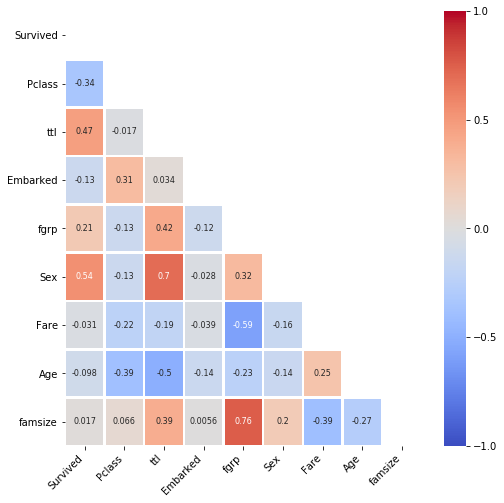

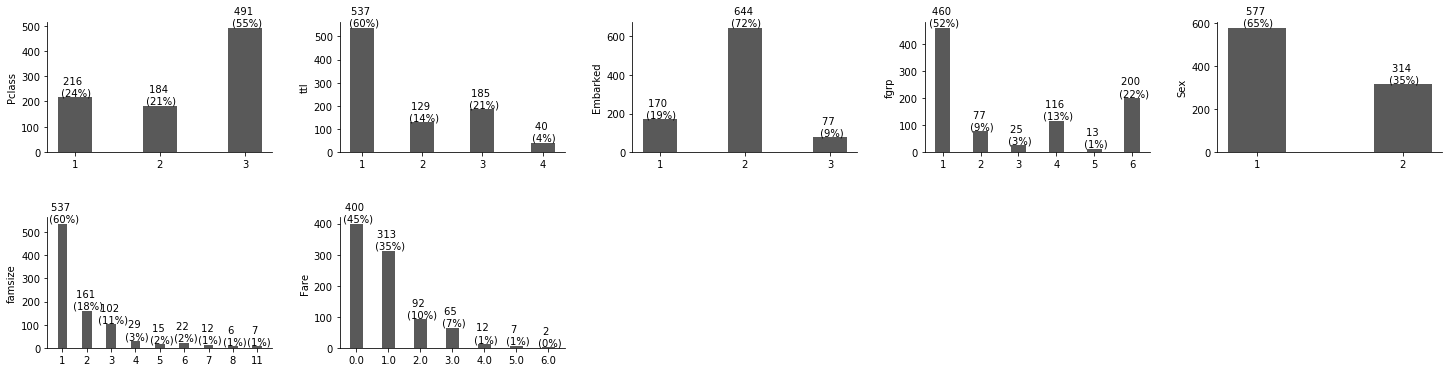

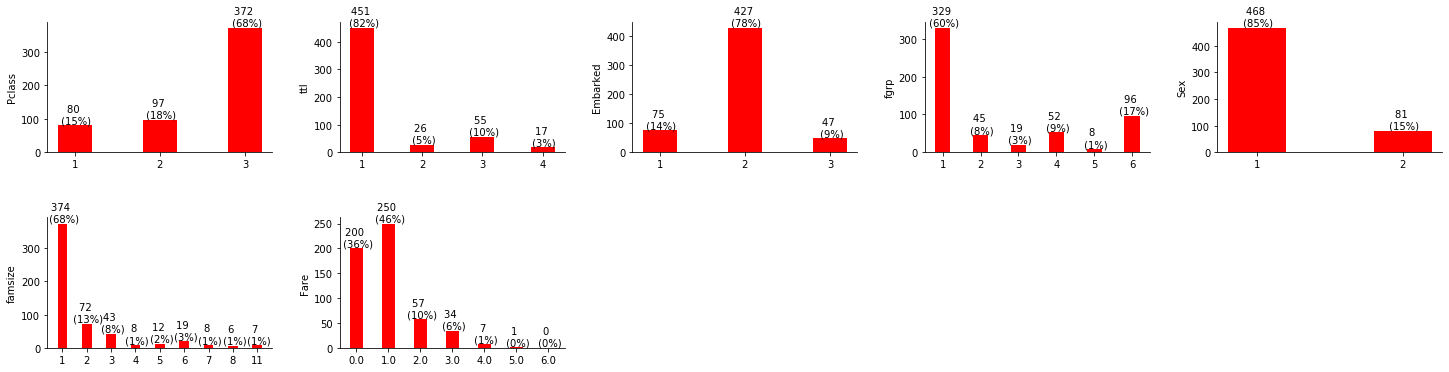

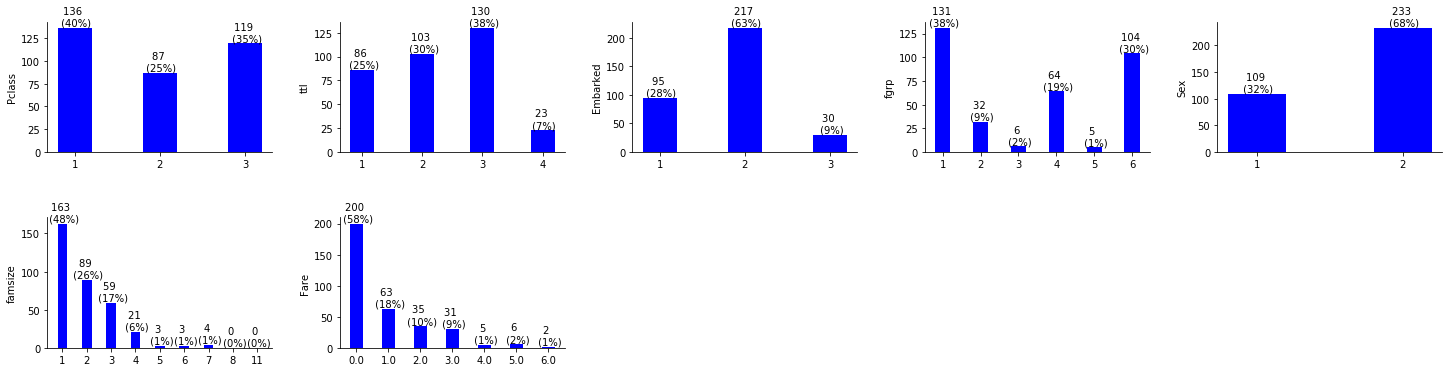

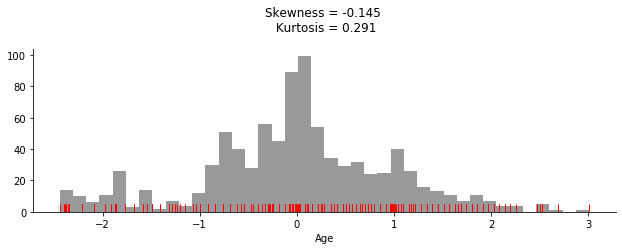

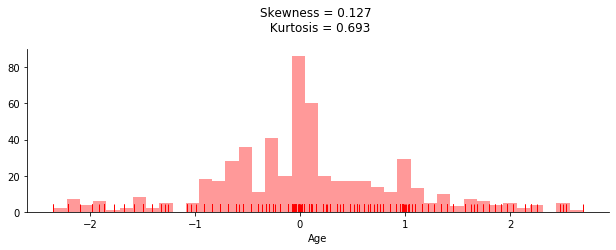

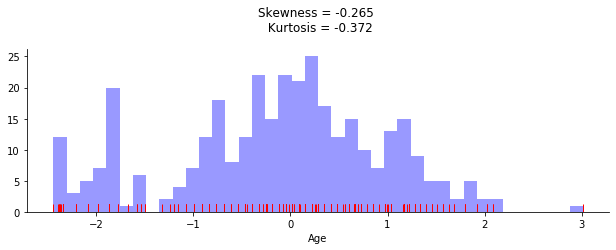

In [215]:
data = data_train1[['Survived','Pclass','ttl','Embarked','fgrp','Sex','Fare', 'Age', 'famsize']]
data_cat = data[['Pclass','ttl','Embarked','fgrp','Sex','famsize', 'Fare']]
data_num = data[['Age']]

#plot correlation matrix
fig = plt.figure()
fig.set_size_inches(8, 8)
corr_matrix = data.corr()
myplt.plot_correlation_matrix(ax=fig.add_subplot(1,1,1),
                              data=corr_matrix,
                             cmap='coolwarm')


grd = list(data_cat.columns)
grd_n = len(grd)
grd_cols_n = 5
grd_rows_n = int(math.ceil(grd_n / grd_cols_n))

plt_h = 3
plt_w = 5

fig_ttl = plt.figure()
fig_ttl.set_size_inches(plt_w * grd_cols_n, 0.3)
ax0 = fig_ttl.add_subplot()
ax0.text(0.5, 0.5, 'Categorical Variables (all)', fontsize=14, horizontalalignment='center', verticalalignment='center')
ax0.axis('off')

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.3, hspace=0.5)

for idx, col in enumerate(data_cat.columns):
    freq = []
    frc = []
    for i in np.sort(data_cat[col].unique()):
        n = len(data.loc[data[col]==i, col].index)
        fr = n / len(data.index)
        freq.append([n])
        frc.append([fr])

    df_freq = pd.DataFrame(freq, columns=['all'], index=np.sort(data_cat[col].unique())).T
    df_frc = pd.DataFrame(frc, columns=['all'], index=data_cat[col].unique()).T
    labs = ['{0:d} \n ({1:.0%})'.format(i,j) for i, j in zip(df_freq.loc['all'], df_frc.loc['all'])]
    myplt.plot_bar_diagram(ax=fig.add_subplot(gs[idx]),
                           data=df_freq,
                           bar_labels=[labs],
                           plots_labels=None,
                           plots_colors=['0.35'],
                           title=None,
                           length_label=col,
                           orient='v',
                           spines={'top': False, 'right': False})

fig_ttl = plt.figure()
fig_ttl.set_size_inches(plt_w * grd_cols_n, 0.3)
ax0 = fig_ttl.add_subplot()
ax0.text(0.5, 0.5, 'Categorical Variables (non-survivals)', fontsize=14, horizontalalignment='center', verticalalignment='center')
ax0.axis('off')

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.3, hspace=0.5)

for idx, col in enumerate(data_cat.columns):
    freq = []
    frc = []
    for i in np.sort(data_cat[col].unique()):
        n0 = len(data.loc[(data['Survived']==0) & (data[col]==i), col].index)
        fr0 = n0 / N_surv0
        freq.append([n0])
        frc.append([fr0])

    df_freq = pd.DataFrame(freq, columns=['non_survivals'], index=np.sort(data_cat[col].unique())).T
    df_frc = pd.DataFrame(frc, columns=['non_survivals'], index=data_cat[col].unique()).T
    labs0 = ['{0:d} \n ({1:.0%})'.format(i,j) for i, j in zip(df_freq.loc['non_survivals'], df_frc.loc['non_survivals'])]
    myplt.plot_bar_diagram(ax=fig.add_subplot(gs[idx]),
                           data=df_freq,
                           bar_labels=[labs0],
                           plots_labels=None,
                           plots_colors=['r'],
                           title=None,
                           length_label=col,
                           orient='v',
                           spines={'top': False, 'right': False})
    
fig_ttl = plt.figure()
fig_ttl.set_size_inches(plt_w * grd_cols_n, 0.3)
ax0 = fig_ttl.add_subplot()
ax0.text(0.5, 0.5, 'Categorical Variables (survivals)', fontsize=14, horizontalalignment='center', verticalalignment='center')
ax0.axis('off')

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.3, hspace=0.5)

for idx, col in enumerate(data_cat.columns):
    freq = []
    frc = []
    for i in np.sort(data_cat[col].unique()):
        n1 = len(data.loc[(data['Survived']==1) & (data[col]==i), col].index)
        fr1 = n1 / N_surv1
        freq.append([n1])
        frc.append([fr1])

    df_freq = pd.DataFrame(freq, columns=['survivals'], index=np.sort(data_cat[col].unique())).T
    df_frc = pd.DataFrame(frc, columns=['survivals'], index=data_cat[col].unique()).T
    labs1 = ['{0:d} \n ({1:.0%})'.format(i,j) for i, j in zip(df_freq.loc['survivals'], df_frc.loc['survivals'])]
    myplt.plot_bar_diagram(ax=fig.add_subplot(gs[idx]),
                           data=df_freq,
                           bar_labels=[labs1],
                           plots_labels=None,
                           plots_colors=['b'],
                           title=None,
                           length_label=col,
                           orient='v',
                           spines={'top': False, 'right': False})
    

    
grd = list(data_num.columns)
grd_n = len(grd)
grd_cols_n = 2
grd_rows_n = int(math.ceil(grd_n / grd_cols_n))

plt_h = 3
plt_w = 12

fig_ttl = plt.figure()
fig_ttl.set_size_inches(plt_w * grd_cols_n, 0.3)
ax0 = fig_ttl.add_subplot()
ax0.text(0.5, 0.5, 'Numerical Variables (all)', fontsize=14, horizontalalignment='center', verticalalignment='center')
ax0.axis('off')

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.3, hspace=0.7)

for idx, col in enumerate(data_num.columns):
    fig.add_subplot(gs[idx])
    df = data[col].dropna()
    ax = sns.distplot(df,
                 bins=40, kde=False, norm_hist=False, rug=True, 
                 rug_kws={'color':'r'},
                 hist_kws={'histtype':'bar', 'linewidth': 3, 'color': "0"})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    skewness = '{0:.3f}'.format(sts.skew(df.values))
    kurtosis = '{0:.3f}'.format(sts.kurtosis(df.values))
    ttl = ax.title
    ttl.set_position([.5, 1.07])
    ax.set_title('Skewness = {0} \n Kurtosis = {1}'.format(skewness, kurtosis))
    
fig_ttl = plt.figure()
fig_ttl.set_size_inches(plt_w * grd_cols_n, 0.3)
ax0 = fig_ttl.add_subplot()
ax0.text(0.5, 0.5, 'Numerical Variables (NON-SURVIVALS)', fontsize=14, horizontalalignment='center', verticalalignment='center')
ax0.axis('off')

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.3, hspace=0.7)

for idx, col in enumerate(data_num.columns):
    fig.add_subplot(gs[idx])
    df = data.loc[data['Survived']==0, col].dropna()
    ax = sns.distplot(df,
                 bins=40, kde=False, norm_hist=False, rug=True, 
                 rug_kws={'color':'r'},
                 hist_kws={'histtype':'bar', 'linewidth': 3, 'color': "r"})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    skewness = '{0:.3f}'.format(sts.skew(df.values))
    kurtosis = '{0:.3f}'.format(sts.kurtosis(df.values))
    ttl = ax.title
    ttl.set_position([.5, 1.07])
    ax.set_title('Skewness = {0} \n Kurtosis = {1}'.format(skewness, kurtosis))
    
fig_ttl = plt.figure()
fig_ttl.set_size_inches(plt_w * grd_cols_n, 0.3)
ax0 = fig_ttl.add_subplot()
ax0.text(0.5, 0.5, 'Numerical Variables (SURVIVALS)', fontsize=14, horizontalalignment='center', verticalalignment='center')
ax0.axis('off')

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.3, hspace=0.7)

for idx, col in enumerate(data_num.columns):
    fig.add_subplot(gs[idx])
    df = data.loc[data['Survived']==1, col].dropna()
    ax = sns.distplot(df,
                 bins=40, kde=False, norm_hist=False, rug=True, 
                 rug_kws={'color':'r'},
                 hist_kws={'histtype':'bar', 'linewidth': 3, 'color': "b"})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    skewness = '{0:.3f}'.format(sts.skew(df.values))
    kurtosis = '{0:.3f}'.format(sts.kurtosis(df.values))
    ttl = ax.title
    ttl.set_position([.5, 1.07])
    ax.set_title('Skewness = {0} \n Kurtosis = {1}'.format(skewness, kurtosis))


In [216]:
# train test split
X = data.drop(columns=['Survived'])
y = data['Survived']

In [134]:
#Train/Test split
X_train, X_test, y_train, y_test =model_selection.train_test_split(X, y, test_size=0.33, random_state=30)
#common random_state
random_state=30
#cross validation strategy
cv_folds = 5
n_repeats = 10
cv = model_selection.RepeatedKFold(n_splits=cv_folds, n_repeats=5, random_state=random_state)
#cross validation metrics
scoring = {'explained_variance':  'explained_variance',
           'r2': 'r2'}